# Trees and Forests Lab

Using the breast cancer data set, build a decision tree with a maxmimum depth of 4 and evaluate its accuracy.

In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_depth=4)
model.fit(data.data, data.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [3]:
ypred = model.predict(data.data)
accuracy_score(data.target, ypred)

0.9824253075571178

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
accuracy_score(y_test, ypred)

0.916083916083916

In [5]:
from sklearn import metrics

metrics.recall_score(y_test, ypred)

0.9662921348314607

In [6]:
metrics.precision_score(y_test, ypred)

0.9052631578947369

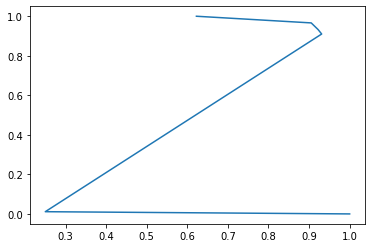

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

prec, rec, _ = metrics.precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(prec, rec)

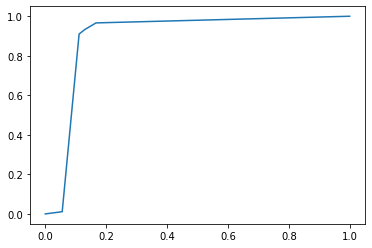

In [8]:
tpos, fpos, _ = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(tpos, fpos)

In [9]:
metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.8974198918019143

Build a RandomForestClassifier with 100 estimators and see if it does any better

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, n_estimators=100)
model.fit(data.data, data.target)
ypred = model.predict(data.data)
accuracy_score(data.target, ypred)

0.9876977152899824

Generate a Pandas series showing the importance of each feature

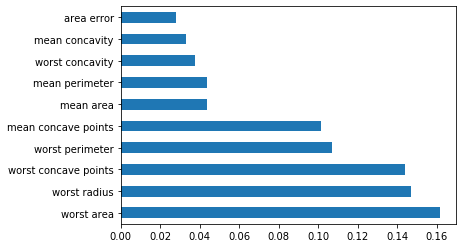

In [14]:
import pandas as pd

importances = pd.Series(model.feature_importances_, index=data.feature_names).sort_values(ascending=False)
importances[:10].plot.barh()

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)


In [47]:
for n_estimators in [10, 50, 100, 150, 200, 400, 800]:
    clf = RandomForestClassifier(max_depth=2, n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    print(f'{n_estimators} => {score}')

10 => 0.972027972027972
50 => 0.9790209790209791
100 => 0.993006993006993
150 => 0.993006993006993
200 => 0.986013986013986
400 => 0.986013986013986
800 => 0.993006993006993


In [42]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)
metrics.accuracy_score(y_test, clf.predict(X_test))

0.9230769230769231